In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import pandas as pd

from plotter import *

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
with open('../xsec.json') as f:
    xs = json.load(f)
        
with open('../pmap.json') as f:
    pmap = json.load(f)

with open('../lumi.json') as f:
    lumis = json.load(f)

Loading ../outfiles-plots/2016_dask_JetHTData.coffea


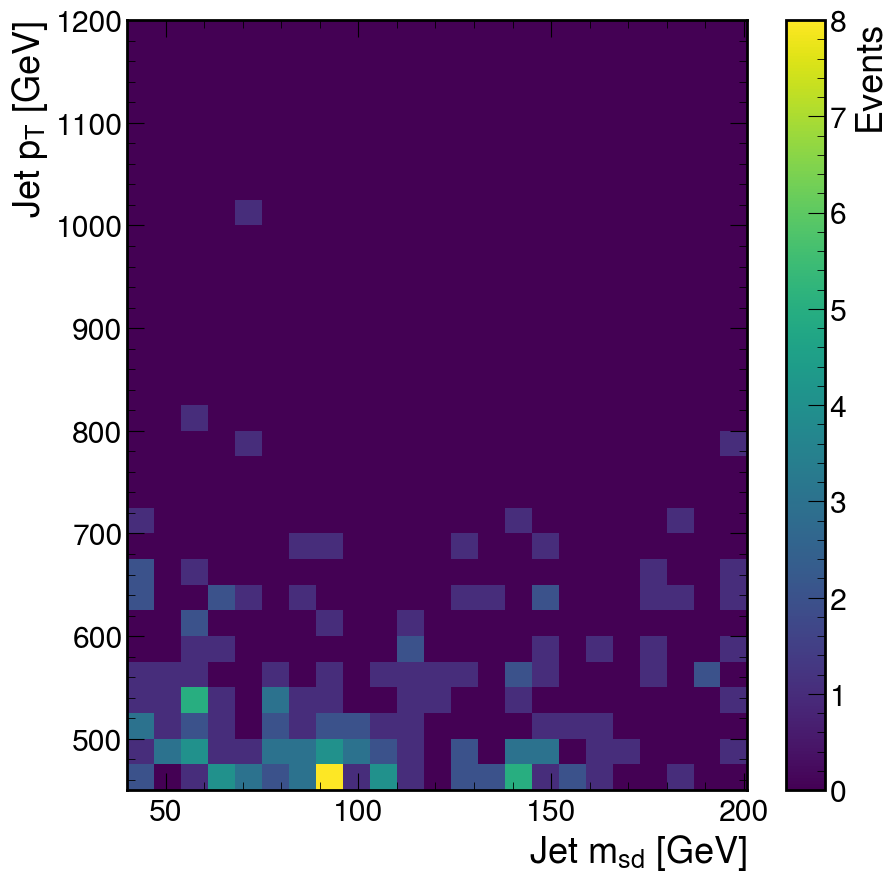

Loading ../outfiles-plots/2017_dask_JetHTData.coffea


EOFError: Ran out of input

In [4]:
indir = "../outfiles-plots/"
for year in ['2016APV','2016','2017','2018']:
    filename = indir+year+"_dask_JetHTData.coffea"

    print("Loading "+filename)
    out = util.load(filename)
        
    scale_lumi = {k: xs[k] * 1000 * lumis[year] / w for k, w in out['sumw'].items()} 
    out['fatjetkin'].scale(scale_lumi, 'dataset')
    
    templates = out['fatjetkin'].group('dataset', hist.Cat('process', 'Process'), pmap).sum('n2ddt1','eta1').integrate('ddb1',int_range=slice(0.64,1)).integrate('region','signal-vbf').integrate('process','data')
    hist.plot2d(templates,xaxis='msd1')
    plt.show()